# Trying out Logistic Regression on review score bins

+  As prework, I binned review scores into three bins:

 1. Good score: 8+
 2. Mediocre: [7, 8)
 3. Bad: < 7 


+  Removed reviews with mediocre scores from the data, and placed good scores in bin '1', and bad scores in bin '0'.

****

+  I also pulled all data on genres for each review from the SQLite database, and created dummy variables for them, since there are only 9 genres. 

    The result of these manipulations is in 'pf_readyforlogistic1.csv'


In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('pf_readyforlogistic1.csv', parse_dates = ['pub_date'], encoding="ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 32 columns):
reviewid              10986 non-null int64
Unnamed: 0            10986 non-null int64
Unnamed: 0.1          10986 non-null int64
content               10986 non-null object
genre                 9674 non-null object
label                 10964 non-null object
title                 10986 non-null object
artist                10986 non-null object
url                   10986 non-null object
score                 10986 non-null float64
best_new_music        10986 non-null int64
author                10986 non-null object
author_type           8561 non-null object
pub_date              10986 non-null datetime64[ns]
pub_weekday           10986 non-null int64
pub_day               10986 non-null int64
pub_month             10986 non-null int64
pub_year              10986 non-null int64
year                  10705 non-null float64
content_words         10986 non-null int64
subjectivity

In [5]:
df = df.drop(['genre'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 31 columns):
reviewid              10986 non-null int64
Unnamed: 0            10986 non-null int64
Unnamed: 0.1          10986 non-null int64
content               10986 non-null object
label                 10964 non-null object
title                 10986 non-null object
artist                10986 non-null object
url                   10986 non-null object
score                 10986 non-null float64
best_new_music        10986 non-null int64
author                10986 non-null object
author_type           8561 non-null object
pub_date              10986 non-null datetime64[ns]
pub_weekday           10986 non-null int64
pub_day               10986 non-null int64
pub_month             10986 non-null int64
pub_year              10986 non-null int64
year                  10705 non-null float64
content_words         10986 non-null int64
subjectivity          10986 non-null float64
polarity  

In [92]:
df.head()

,reviewid,Unnamed: 0,Unnamed: 0.1,content,label,title,artist,url,score,best_new_music,...,score_bin,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock,sum_genres
0,1,0,0,"Aberfeldy recorded their debut, Young Forever,...",rough trade,young forever,aberfeldy,http://pitchfork.com/reviews/albums/1-young-fo...,3.4,0,...,0,0,0,0,0,0,0,0,1,NaN
1,7,2,2,Funny what gets tagged for popular comebacks t...,darla,or you could just go through your whole life a...,aarktica,http://pitchfork.com/reviews/albums/7-or-you-c...,8.1,0,...,1,0,0,0,0,0,0,0,0,NaN
2,10,4,4,ABCS are all about unity. Their bandname come...,troubleman unlimited,abcs,abcs,http://pitchfork.com/reviews/albums/10-abcs/,8.0,0,...,1,0,0,0,1,0,0,0,0,NaN
3,15,7,7,Brad Nessler: Welcome to our wrap-up of Game F...,deconstruction,love & hate,aceyalone,http://pitchfork.com/reviews/albums/15-love-hate/,6.7,0,...,0,0,0,0,0,0,0,1,1,NaN
4,18,10,10,This should be great. On albums like 1995's Al...,decon,magnificent city,aceyalone,http://pitchfork.com/reviews/albums/18-magnifi...,3.2,0,...,0,0,0,0,0,0,0,1,1,NaN


In [9]:
import re
y = ['score_bin']
X = ['content_words', 'pub_weekday', 'pub_day', 'pub_month', 'pub_year', 'content_words', 'subjectivity', 'polarity']
X_extension = [x for x in df.columns if re.match('genre_', x)]
X.extend(X_extension)

## As a first stab, let's try to select six features to try to predict score bins

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

logreg = LogisticRegression()

rfe = RFE(logreg, 6)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Dinara\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dinara\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\Dinara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False  True  True  True False  True  True
 False  True False False]
[ 9  7 11  8 10  6  1  1  1  4  1  1  5  1  3  2]


In [27]:
# cols are the list of column names that we will use in logistic regression
cols = [u for v,u in zip(rfe.support_, X) if v]
cols

['subjectivity',
 'polarity',
 'genre_experimental',
 'genre_global',
 'genre_jazz',
 'genre_pop/r&b']

In [28]:
X

['content_words',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year',
 'content_words',
 'subjectivity',
 'polarity',
 'genre_experimental',
 'genre_folk/country',
 'genre_global',
 'genre_jazz',
 'genre_metal',
 'genre_pop/r&b',
 'genre_rap',
 'genre_rock']

In [29]:
X_LogisticR=df[cols]
y_LogisticR=df[y]

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(y_LogisticR,X_LogisticR)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.632860
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              score_bin   No. Observations:                10986
Model:                          Logit   Df Residuals:                    10980
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Mar 2018   Pseudo R-squ.:                 0.02081
Time:                        19:56:42   Log-Likelihood:                -6952.6
converged:                       True   LL-Null:                       -7100.3
                                        LLR p-value:                 9.516e-62
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
subjectivity          -2.4249      0.100    -24.173      0.000      -2.622      -2.228
polar

## The p-values for most of the variables are smaller than 0.05, therefore, most of them are significant to the model (???)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_LogisticR, y_LogisticR.values.ravel(), test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.659


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2084   82]
 [1030  100]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.96      0.79      2166
          1       0.55      0.09      0.15      1130

avg / total       0.63      0.66      0.57      3296



## ROC Curve.
### The red dotted line is a random classifier.  A good classifier stays as far away from that line as possible.

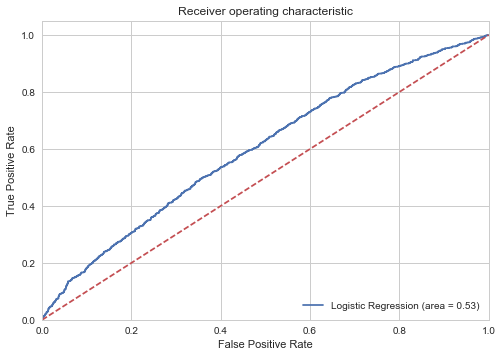

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## I tried with different numbers of predictor variables. It turns out having 8 predictor variables maximizes f1 score to 5.8.

In [82]:
y = ['score_bin']
logreg = LogisticRegression()

rfe = RFE(logreg, 8)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Dinara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False  True  True  True False  True  True
 False  True  True  True]
[7 5 9 6 8 4 1 1 1 2 1 1 3 1 1 1]


In [83]:
cols = [u for v,u in zip(rfe.support_, X) if v]
cols

['subjectivity',
 'polarity',
 'genre_experimental',
 'genre_global',
 'genre_jazz',
 'genre_pop/r&b',
 'genre_rap',
 'genre_rock']

In [84]:
X_LogisticR=df[cols]
y_LogisticR=df[y]
logit_model=sm.Logit(y_LogisticR,X_LogisticR)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.630243
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              score_bin   No. Observations:                10986
Model:                          Logit   Df Residuals:                    10978
Method:                           MLE   Df Model:                            7
Date:                Sat, 17 Mar 2018   Pseudo R-squ.:                 0.02485
Time:                        20:26:53   Log-Likelihood:                -6923.9
converged:                       True   LL-Null:                       -7100.3
                                        LLR p-value:                 2.880e-72
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
subjectivity          -1.9792      0.116    -17.128      0.000      -2.206      -1.753
polar

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_LogisticR, y_LogisticR.values.ravel(), test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [87]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.661


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[2073   93]
 [1019  111]]


In [89]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.96      0.79      2166
          1       0.54      0.10      0.17      1130

avg / total       0.63      0.66      0.58      3296



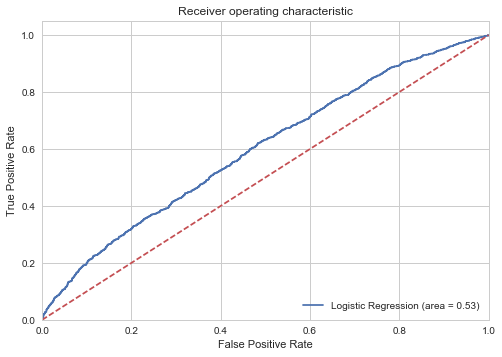

In [90]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()